# Analysis
1.There is a strong correlation between the cities that are closer to the equator and higher temperatures.


2.There doesn't appear to be a correlation between latitude and cloudiness, as it is random and seems to be cloudy evenly everywhere.


3.There seems to generally be higher wind speeds south of the equator.

In [55]:
#Dependencies
import requests
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from citipy import citipy
import csv
import random
import math
from config import api_key
import numpy as np
import time

In [56]:
# Build data frame with random lat/lon and closest city, country
lat_zone = np.arange(-45, 45,15)
lon_zone = np.arange(-90,90,15)

# Set up DataFrame to hold randomly picked lat/lon coordinates
cities_df = pd.DataFrame()
cities_df["Latitude"]=""
cities_df["Longitude"]=""
# Pick random coordinates
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x, x+15, .01, dtype = float))
        y_values = list(np.arange(y, y+15, .01, dtype = float))
        lats = random.sample(x_values, 10)
        lons = random.sample(y_values, 10)
        lat_samples = [(x+ran_lat) for ran_lat in lats]
        lon_samples = [(y+ran_lon) for ran_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,"Longitude":lon_samples}))

cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,Latitude,Longitude
0,-81.82,-171.70
1,-89.52,-165.10
2,-79.95,-175.02
3,-88.77,-172.33
4,-87.05,-166.65


In [57]:
cities_df = cities_df.drop_duplicates()
cities_df.shape

(720, 2)

In [58]:
cities_df["Closest City Name"]=''
cities_df["Closest Country Code"]=''
for index, row in cities_df.iterrows():
    city=citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index, "Closest City Name", city.city_name)
    cities_df.set_value(index, "Closest Country Code", city.country_code)
cities_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Latitude,Longitude,Closest City Name,Closest Country Code
0,-81.82,-171.70,vaini,to
1,-89.52,-165.10,mataura,pf
2,-79.95,-175.02,vaini,to
3,-88.77,-172.33,vaini,to
4,-87.05,-166.65,mataura,pf


In [59]:
selected_cities = cities_df.sample(500)
selected_cities = selected_cities.reset_index(drop=True)
selected_cities

,Latitude,Longitude,Closest City Name,Closest Country Code
0,72.58,-22.57,illoqqortoormiut,gl
1,-88.77,-172.33,vaini,to
2,8.85,-22.36,praia,cv
3,-20.30,103.93,carnarvon,au
4,0.62,7.79,port-gentil,ga
5,-76.05,95.57,albany,au
6,67.01,122.90,zhigansk,ru
7,-23.04,69.48,grand river south east,mu
8,13.73,-78.40,san andres,co
9,66.77,63.53,yeletskiy,ru


In [60]:
row_count = 0

# Create blank columns for the necessary fields.

selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""

# Loop through and get the weather data using the Open Weather API.

for index, row in selected_cities.iterrows():
    #Sleep to help with the call limit
    
    time.sleep(1)
    
    #Open weather url.
    
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"
    
    query_url = url + "lat="+ str(row["Latitude"]) + "&lon=" + str(row["Longitude"])+ "&appid=" + api_key + "&units=" + units
    #Print log to ensure the loop is working correctly.
    
    print("Now retrieving city # " + str(row_count))
    print(query_url)
    row_count += 1
    
    city_weather = requests.get(query_url).json()
   
    #Append the weather data to the appropriate columns.
    #Use try/except to skip any cities with errors.
    #selected_cities.append(requests.get(query_url + str(city_weather)).json())
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        name = city_weather['name']
        selected_cities.set_value(index, "Temperature", temperature)
        selected_cities.set_value(index,"Humidity", humidity)
        selected_cities.set_value(index,"Cloudiness", cloudiness)
        selected_cities.set_value(index,"Wind Speed", wind_speed)

    except:
        print("Error with weather data, skipping.")
        #continue
selected_cities

Now retrieving city # 0
https://api.openweathermap.org/data/2.5/weather?lat=72.58000000000197&lon=-22.570000000000157&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Now retrieving city # 1
https://api.openweathermap.org/data/2.5/weather?lat=-88.77000000000024&lon=-172.32999999999606&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 2
https://api.openweathermap.org/data/2.5/weather?lat=8.85&lon=-22.360000000000163&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 3
https://api.openweathermap.org/data/2.5/weather?lat=-20.300000000000207&lon=103.92999999999722&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 4
https://api.openweathermap.org/data/2.5/weather?lat=0.62&lon=7.79&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 5
https://api.openweathermap.org/data/2.5/weather?lat=-76.05000000000277&lon=95.56999999999888&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 6
https://api.openweathermap.org/data/2.5/weather?lat=67.0100000000011&lon=122.89999999999942&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrie

Now retrieving city # 50
https://api.openweathermap.org/data/2.5/weather?lat=3.38&lon=-178.06999999999903&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 51
https://api.openweathermap.org/data/2.5/weather?lat=31.36999999999997&lon=-51.48999999999867&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 52
https://api.openweathermap.org/data/2.5/weather?lat=-76.4000000000027&lon=-114.77000000000103&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 53
https://api.openweathermap.org/data/2.5/weather?lat=10.870000000000001&lon=158.84000000000452&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 54
https://api.openweathermap.org/data/2.5/weather?lat=10.42&lon=6.91&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 55
https://api.openweathermap.org/data/2.5/weather?lat=63.15000000000049&lon=14.36&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving ci

Now retrieving city # 99
https://api.openweathermap.org/data/2.5/weather?lat=10.93&lon=-26.35000000000008&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 100
https://api.openweathermap.org/data/2.5/weather?lat=61.16000000000018&lon=164.34000000000734&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 101
https://api.openweathermap.org/data/2.5/weather?lat=2.54&lon=-146.7299999999983&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 102
https://api.openweathermap.org/data/2.5/weather?lat=9.0&lon=159.64000000000493&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 103
https://api.openweathermap.org/data/2.5/weather?lat=-24.100000000000126&lon=-18.230000000000253&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 104
https://api.openweathermap.org/data/2.5/weather?lat=73.12000000000205&lon=-116.4600000000007&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial

Now retrieving city # 148
https://api.openweathermap.org/data/2.5/weather?lat=36.769999999999854&lon=153.05000000000155&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 149
https://api.openweathermap.org/data/2.5/weather?lat=36.539999999999864&lon=-137.20999999999344&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 150
https://api.openweathermap.org/data/2.5/weather?lat=34.949999999999896&lon=151.2000000000006&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 151
https://api.openweathermap.org/data/2.5/weather?lat=-18.460000000000246&lon=8.94&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 152
https://api.openweathermap.org/data/2.5/weather?lat=32.06999999999996&lon=-86.06000000000078&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 153
https://api.openweathermap.org/data/2.5/weather?lat=13.67&lon=-136.84999999999326&appid=f1d6a2a44804f4e2b3b88ae1b2b2ca

Now retrieving city # 196
https://api.openweathermap.org/data/2.5/weather?lat=-84.90000000000101&lon=-109.4700000000021&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 197
https://api.openweathermap.org/data/2.5/weather?lat=-76.39000000000271&lon=-84.37000000000111&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 198
https://api.openweathermap.org/data/2.5/weather?lat=31.84999999999996&lon=74.80000000000231&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 199
https://api.openweathermap.org/data/2.5/weather?lat=-58.12999999999971&lon=-87.58000000000048&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 200
https://api.openweathermap.org/data/2.5/weather?lat=0.58&lon=-172.7699999999963&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 201
https://api.openweathermap.org/data/2.5/weather?lat=40.60999999999977&lon=40.65999999999977&appid=f1d6a2a44804f4e2b3b88a

Now retrieving city # 244
https://api.openweathermap.org/data/2.5/weather?lat=33.05999999999993&lon=-83.73000000000124&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 245
https://api.openweathermap.org/data/2.5/weather?lat=44.0199999999997&lon=-28.920000000000023&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 246
https://api.openweathermap.org/data/2.5/weather?lat=-28.650000000000027&lon=-17.480000000000267&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 247
https://api.openweathermap.org/data/2.5/weather?lat=64.5400000000007&lon=90.41999999999992&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 248
https://api.openweathermap.org/data/2.5/weather?lat=71.35000000000177&lon=3.02&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 249
https://api.openweathermap.org/data/2.5/weather?lat=-47.42999999999803&lon=-106.06000000000277&appid=f1d6a2a44804f4e2b3b88

Now retrieving city # 293
https://api.openweathermap.org/data/2.5/weather?lat=42.71999999999973&lon=-167.25999999999348&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 294
https://api.openweathermap.org/data/2.5/weather?lat=65.57000000000087&lon=74.79000000000231&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 295
https://api.openweathermap.org/data/2.5/weather?lat=-80.23000000000195&lon=127.88999999999842&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 296
https://api.openweathermap.org/data/2.5/weather?lat=-19.120000000000232&lon=64.4900000000007&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 297
https://api.openweathermap.org/data/2.5/weather?lat=-23.48000000000014&lon=134.38999999999714&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 298
https://api.openweathermap.org/data/2.5/weather?lat=-16.520000000000287&lon=-105.04000000000298&appid=f1d6a

Now retrieving city # 341
https://api.openweathermap.org/data/2.5/weather?lat=-46.719999999997924&lon=-79.56000000000208&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 342
https://api.openweathermap.org/data/2.5/weather?lat=-87.65000000000046&lon=-16.150000000000297&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 343
https://api.openweathermap.org/data/2.5/weather?lat=13.290000000000001&lon=-54.43999999999913&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 344
https://api.openweathermap.org/data/2.5/weather?lat=69.83000000000153&lon=9.03&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 345
https://api.openweathermap.org/data/2.5/weather?lat=37.00999999999985&lon=-56.07999999999939&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 346
https://api.openweathermap.org/data/2.5/weather?lat=41.299999999999756&lon=-144.08999999999696&appid=f1d6a2a44804f4e2b

Now retrieving city # 389
https://api.openweathermap.org/data/2.5/weather?lat=71.5200000000018&lon=-45.68999999999777&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 390
https://api.openweathermap.org/data/2.5/weather?lat=-57.479999999999606&lon=71.66000000000182&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 391
https://api.openweathermap.org/data/2.5/weather?lat=1.48&lon=-146.30999999999813&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 392
https://api.openweathermap.org/data/2.5/weather?lat=-18.480000000000246&lon=-46.63999999999791&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 393
https://api.openweathermap.org/data/2.5/weather?lat=-76.4300000000027&lon=-110.88000000000181&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 394
https://api.openweathermap.org/data/2.5/weather?lat=34.7799999999999&lon=126.09999999999879&appid=f1d6a2a44804f4e2b3b8

Now retrieving city # 438
https://api.openweathermap.org/data/2.5/weather?lat=-88.18000000000036&lon=38.979999999999805&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 439
https://api.openweathermap.org/data/2.5/weather?lat=-56.58999999999946&lon=-137.30999999999352&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 440
https://api.openweathermap.org/data/2.5/weather?lat=10.99&lon=73.26000000000207&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 441
https://api.openweathermap.org/data/2.5/weather?lat=-46.99999999999797&lon=0.14&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 442
https://api.openweathermap.org/data/2.5/weather?lat=-49.219999999998315&lon=-22.600000000000158&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 443
https://api.openweathermap.org/data/2.5/weather?lat=12.75&lon=-82.59000000000148&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imp

Now retrieving city # 487
https://api.openweathermap.org/data/2.5/weather?lat=-47.14999999999799&lon=-51.78999999999871&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 488
https://api.openweathermap.org/data/2.5/weather?lat=63.480000000000544&lon=96.98999999999862&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 489
https://api.openweathermap.org/data/2.5/weather?lat=14.31&lon=38.13999999999983&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 490
https://api.openweathermap.org/data/2.5/weather?lat=63.25000000000051&lon=-26.050000000000082&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 491
https://api.openweathermap.org/data/2.5/weather?lat=38.53999999999982&lon=125.78999999999886&appid=f1d6a2a44804f4e2b3b88ae1b2b2cae6&units=Imperial
Now retrieving city # 492
https://api.openweathermap.org/data/2.5/weather?lat=-46.16999999999784&lon=-28.240000000000038&appid=f1d6a2a44804f4e2b3b

,Latitude,Longitude,Closest City Name,Closest Country Code,Temperature,Humidity,Cloudiness,Wind Speed
0,72.58,-22.57,illoqqortoormiut,gl,31.03,89,0,5.73
1,-88.77,-172.33,vaini,to,-59.33,0,24,13.44
2,8.85,-22.36,praia,cv,79.18,100,80,5.06
3,-20.30,103.93,carnarvon,au,73.24,100,0,1.48
4,0.62,7.79,port-gentil,ga,75.22,100,76,14.79
5,-76.05,95.57,albany,au,-56.36,0,12,14.56
6,67.01,122.90,zhigansk,ru,42.28,85,76,10.65
7,-23.04,69.48,grand river south east,mu,69.55,100,88,23.73
8,13.73,-78.40,san andres,co,82.87,95,24,22.62
9,66.77,63.53,yeletskiy,ru,48.76,98,0,2.71


In [76]:
selected_cities.to_csv("WeatherData.csv", index=False)

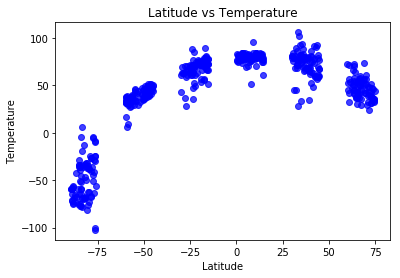

In [73]:
plt.scatter(selected_cities['Latitude'], selected_cities["Temperature"], c='b', alpha = .75)
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Temperature.png")
plt.show()

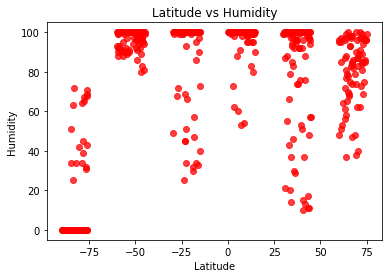

In [72]:
plt.scatter(selected_cities['Latitude'], selected_cities["Humidity"], c='r', alpha = .75)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

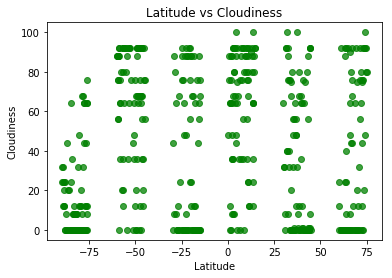

In [74]:
plt.scatter(selected_cities['Latitude'], selected_cities["Cloudiness"], c='g', alpha = .75)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

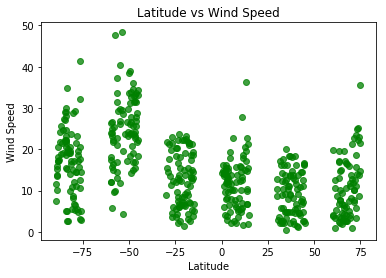

In [75]:
plt.scatter(selected_cities['Latitude'], selected_cities["Wind Speed"], c='g', alpha = .75)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()